https://zhuanlan.zhihu.com/p/81488678?utm_campaign=shareopn&utm_medium=social&utm_oi=1005475961713926144&utm_psn=1548293960929615872&utm_source=wechat_session

- 方法：有限差分方法的显式格式：前向差分--可以直接递推求解（需要步长足够小）
- 可视化：折线图，二维轮廓线热力图，三维热力图

In [65]:
import numpy as np
import matplotlib.pyplot as plt

L = 3; T = 1
h = 0.1 # 空间步长
N = int(L / h) # 空间步数
dt = 0.0001 # 时间步长
M = int(T / dt) # 时间的步数
print(N, M)

A = dt / (h**2) # lambda*tau/h^2
U = np.zeros([N + 1, M + 1]) # 建立二维空数组

# 边界条件
for k in range(0, M + 1):
    U[0, k] = 0
    U[N, k] = 0

# 初始条件
for i in range(0, N + 1):
    U[i, 0]=4 * i*h * (3 - i*h)

# 递推关系
for k in range(0, M):
    for i in range(1, N):
        U[i, k+1] = A * U[i+1, k] + (1 - 2*A) * U[i, k] + A * U[i-1, k]

30 10000


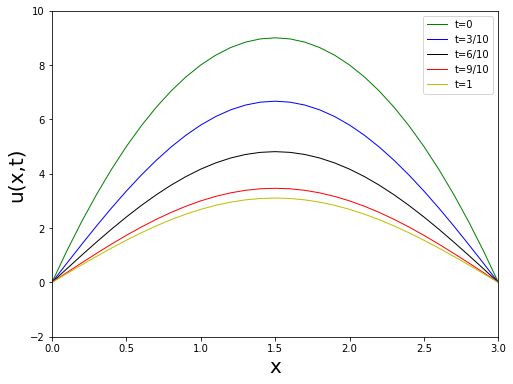

In [66]:
#不同时刻的温度随空间坐标的变化
xx = np.arange(0, (N + 1) * h, h) # 建立空间等差数列
tt = np.arange(0, (M + 1) * dt, dt)

plt.figure(figsize=(8, 6))
plt.plot(xx, U[:, 0], 'g-', label='t=0',linewidth=1.0)
plt.plot(xx, U[:, int(M*3/10)], 'b-', label='t=3/10',linewidth=1.0)
plt.plot(xx, U[:, int(M*6/10)], 'k-', label='t=6/10',linewidth=1.0)
plt.plot(xx, U[:, int(M*9/10)], 'r-', label='t=9/10',linewidth=1.0)
plt.plot(xx, U[:, M], 'y-', label='t=1',linewidth=1.0)

plt.ylabel('u(x,t)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.xlim(0, 3)
plt.ylim(-2, 10)
plt.legend(loc='upper right')
plt.show()

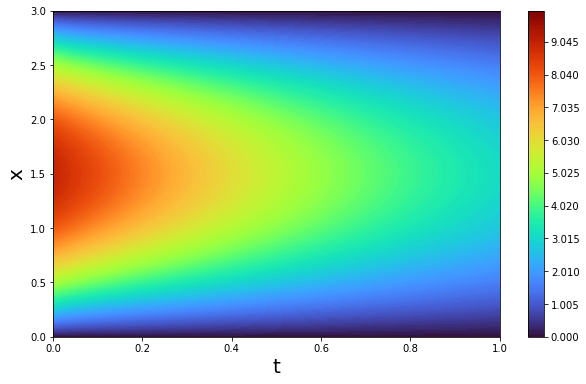

In [70]:
# 温度等高线随时空坐标的变化，温度越高，颜色越偏红

extent = [0,1,0,3] # 时间和空间的取值范围（放缩）
levels = np.linspace(0, 10, 200) # 温度等高线
fig, ax = plt.subplots(figsize=(10, 6))
pc = ax.contourf(U, levels=levels, extent=extent, cmap='turbo')
# pc = ax.contourf(U, levels=levels, extent=extent, cmap='RdBu_r')
fig.colorbar(pc, ax=ax)
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)

plt.show()

In [68]:
X, T = np.meshgrid(xx, tt)
X.shape, T.shape, U.shape

((10001, 31), (10001, 31), (31, 10001))

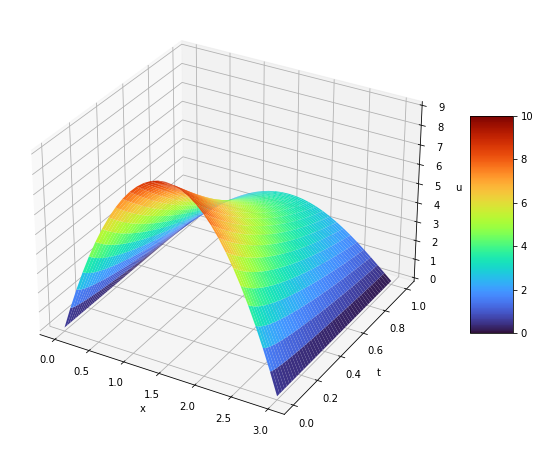

In [71]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
surf = ax.plot_surface(X, T, U.T, cmap='turbo', vmin=0, vmax=10)
# surf = ax.plot_surface(X, T, U.T, cmap='RdBu_r', vmin=0, vmax=10)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

plt.show()